## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from xgboost import XGBClassifier
from sklearn import metrics

## Importing DF

In [3]:
df = pd.read_csv(r'C:\Programacion\Datasets\marketing_campaign.csv', sep= "\t")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Cleaning

### Duplicated

In [9]:
df.duplicated().sum()

0

### Invalid Values

In [11]:
for column in df.select_dtypes(include='object').columns:
    print(df[column].value_counts(),end='\n\n')

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 663, dtype: int64



In [4]:
df.Marital_Status.replace({'Alone':pd.NA,'Absurd':np.nan,'YOLO':np.nan},inplace=True)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],errors='coerce')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6472\3110568412.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],errors='coerce')


In [5]:
df.drop(df.loc[df.Year_Birth<1940].index,inplace=True)

### Missing Values

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          7
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df.fillna({'Marital_Status': df.Marital_Status.mode()[0],
          'Income': df.Income.mean()},inplace=True)

## EDA

In [8]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


<Axes: xlabel='Response', ylabel='count'>

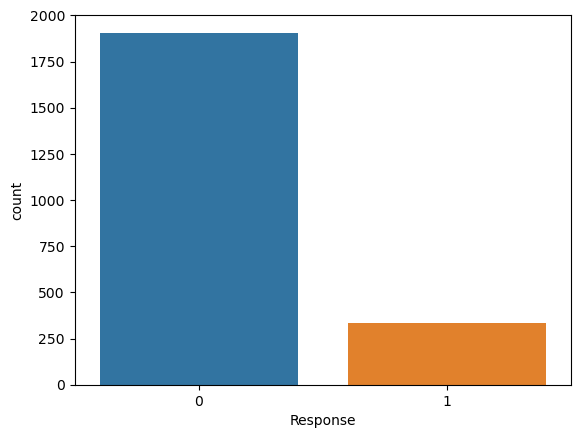

In [24]:
sns.countplot(x=df.Response)

In [36]:
print(f'Entre los entrevistados la persona de menor edad habia nacido en {df.Year_Birth.max()} y la persona de mayor edad en {df.Year_Birth.min()}')

Entre los entrevistados la persona de menor edad habia nacido en 1996 y la persona de mayor edad en 1940


<Axes: xlabel='Education', ylabel='count'>

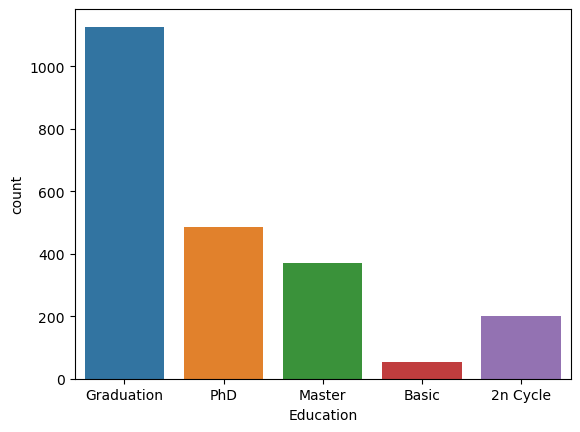

In [37]:
sns.countplot(x=df.Education)

<Axes: xlabel='Response'>

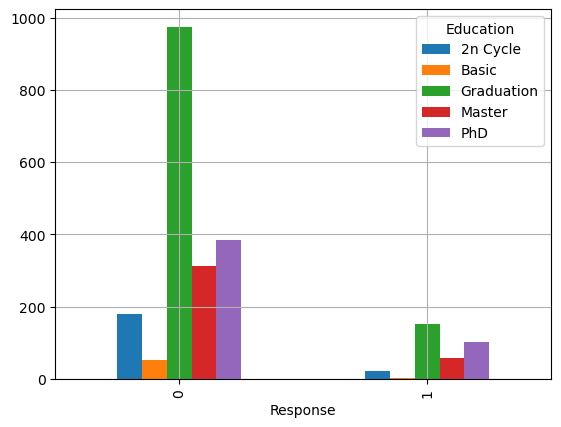

In [40]:
df.groupby('Response')['Education'].value_counts().unstack().plot(kind='bar',grid='on')

<Axes: xlabel='Response'>

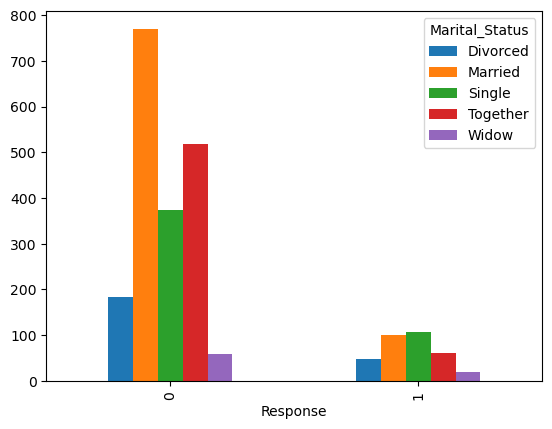

In [51]:
df.groupby('Response')['Marital_Status'].value_counts().unstack().plot(kind='bar')

In [55]:
print(f'The average income is {round(df.Income.mean(),2)}, and the max and min incomes are {df.Income.max()} and {df.Income.min()} respectivily.')

The average income is 52236.7, and the max and min incomes are 666666.0 and 1730.0 respectivily.


In [9]:
bins = [0,52237,float('inf')]
labels=['Low Income','High Income']
df['Income_Classification'] = pd.cut(df.Income,bins=bins,labels=labels)

<Axes: xlabel='Income_Classification'>

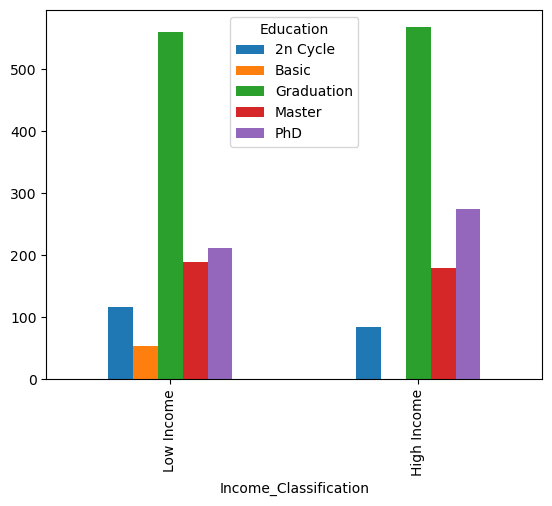

In [59]:
df.groupby('Income_Classification')['Education'].value_counts().unstack().plot(kind='bar')

In [60]:
df.corr()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11240\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.003024,0.013777,0.002202,-0.003543,-0.046755,-0.021181,0.007080,-0.002622,-0.023181,...,-0.008104,-0.035959,-0.025292,-0.005062,-0.021524,-0.015027,0.031520,NaN,NaN,-0.021810
Year_Birth,0.003024,1.000000,-0.162393,0.234133,-0.363350,-0.019670,-0.163035,-0.013751,-0.030927,-0.042519,...,0.117570,0.061013,-0.064341,0.015322,-0.008227,-0.007657,-0.004479,NaN,NaN,0.018424
Income,0.013777,-0.162393,1.000000,-0.424736,0.019170,-0.003091,0.576617,0.428148,0.577521,0.437147,...,-0.549469,-0.016058,0.183004,0.333936,0.275170,0.087628,-0.024902,NaN,NaN,0.133010
Kidhome,0.002202,0.234133,-0.424736,1.000000,-0.035753,0.007544,-0.496367,-0.372488,-0.437059,-0.387536,...,0.447641,0.014606,-0.161775,-0.204994,-0.172512,-0.081794,0.036283,NaN,NaN,-0.080176
Teenhome,-0.003543,-0.363350,0.019170,-0.035753,1.000000,0.017115,0.005409,-0.175951,-0.260820,-0.203900,...,0.134491,-0.042823,0.038790,-0.190227,-0.140288,-0.015664,0.007591,NaN,NaN,-0.154730
Recency,-0.046755,-0.019670,-0.003091,0.007544,0.017115,1.000000,0.016668,-0.003592,0.023705,0.001532,...,-0.021959,-0.032976,0.018890,0.000956,-0.019258,-0.001764,0.005398,NaN,NaN,-0.198568
MntWines,-0.021181,-0.163035,0.576617,-0.496367,0.005409,0.016668,1.000000,0.388518,0.561993,0.399073,...,-0.320337,0.062201,0.373532,0.471969,0.354365,0.206040,-0.035930,NaN,NaN,0.247392
MntFruits,0.007080,-0.013751,0.428148,-0.372488,-0.175951,-0.003592,0.388518,1.000000,0.542057,0.594438,...,-0.417427,0.014983,0.010402,0.212027,0.195380,-0.009701,-0.002800,NaN,NaN,0.125904
MntMeatProducts,-0.002622,-0.030927,0.577521,-0.437059,-0.260820,0.023705,0.561993,0.542057,1.000000,0.567880,...,-0.539203,0.018331,0.103053,0.372212,0.310096,0.043090,-0.020720,NaN,NaN,0.236640
MntFishProducts,-0.023181,-0.042519,0.437147,-0.387536,-0.203900,0.001532,0.399073,0.594438,0.567880,1.000000,...,-0.445760,0.000370,0.016864,0.198163,0.260908,0.002583,-0.018818,NaN,NaN,0.111415


## Featuring Engeenir

In [10]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
fdf = pd.concat([df.drop(columns=cat_cols),pd.get_dummies(df[cat_cols])],axis=1)

In [11]:
X = fdf.drop(columns=['ID','Income_Classification','Response','Dt_Customer'])
y = fdf.Response
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [27]:
X

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,0,0,0,0,1,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,0,1,0,0,0,0,1,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,0,1,0,0,0,0,0,1,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,0,1,0,0,0,0,0,1,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,0,0,1,0,0,0,1,0,0,0
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,0,1,0,0,0,1,0
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,0,0,1,0,0,1,0,0,0,0
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,1,0,0,0,0,1,0


In [12]:
y

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2237, dtype: int64

### XGBClassifier

In [ ]:
grid={'n_estimators':[50,70,100],'max_depth':range(1,11),'learning_rate':[0.001,0.01,0.1],'subsample':[0.3,0.5,0.7,0.9]}
gs = GridSearchCV(XGBClassifier(),param_grid=grid,scoring='precision')
gs.fit(X_train,y_train)

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Pr

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Pr

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Pr

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Pr

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Pr

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Pr

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Pr

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Pr

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Pr

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Pr

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Pr

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Pr

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Pr

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Pr

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Pr

In [88]:
gs.best_params_, gs.best_score_

({'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.9},
 0.8870835485032)

In [81]:
xgb = XGBClassifier(learning_rate=0.1,max_depth=4,n_estimators=50,subsample=0.9)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

In [82]:
print(f'{accuracy_score(y_test,y_pred)},{precision_score(y_test,y_pred)},{recall_score(y_test,y_pred)},{f1_score(y_test,y_pred)}')

0.9040178571428571,0.8421052631578947,0.2857142857142857,0.4266666666666667


In [76]:
from hyperopt import hp,fmin,STATUS_OK,Trials,tpe
space = {'learning_rate': hp.uniform('learning_rate',0.001,0.1), 'max_depth': hp.quniform('max_depth',1,20,1), 'n_estimators': hp.quniform('n_estimators',50,100,1), 'subsample': hp.uniform('subsample',0,1),'reg_alpha': hp.quniform('reg_alpha',0,20,1),'reg_lambda': hp.quniform('reg_lambda',0,20,1)}

def objective(space):
    model = XGBClassifier(learning_rate=space['learning_rate'],max_depth=int(space['max_depth']),subsample=space['subsample'],n_estimators= int(space['n_estimators']),reg_alpha= int(space['reg_alpha']),reg_lambda=int(space['reg_lambda']))
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    model.fit(X_train, y_train,eval_set=evaluation)
    pred = model.predict(X_test)
    f1 = metrics.f1_score(y_test, pred>0.5)
    return {'loss': -f1, 'status': STATUS_OK }

In [77]:
trials = Trials()
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

[0]	validation_0-logloss:0.43553	validation_1-logloss:0.39454
[1]	validation_0-logloss:0.43212	validation_1-logloss:0.39215
[2]	validation_0-logloss:0.42903	validation_1-logloss:0.39015
[3]	validation_0-logloss:0.42604	validation_1-logloss:0.38816
[4]	validation_0-logloss:0.42291	validation_1-logloss:0.38588
[5]	validation_0-logloss:0.41981	validation_1-logloss:0.38381
[6]	validation_0-logloss:0.41674	validation_1-logloss:0.38194
[7]	validation_0-logloss:0.41385	validation_1-logloss:0.37974
[8]	validation_0-logloss:0.41101	validation_1-logloss:0.37784
[9]	validation_0-logloss:0.40849	validation_1-logloss:0.37614
[10]	validation_0-logloss:0.40596	validation_1-logloss:0.37453
[11]	validation_0-logloss:0.40352	validation_1-logloss:0.37282
[12]	validation_0-logloss:0.40098	validation_1-logloss:0.37113
[13]	validation_0-logloss:0.39850	validation_1-logloss:0.36951
[14]	validation_0-logloss:0.39596	validation_1-logloss:0.36801
[15]	validation_0-logloss:0.39390	validation_1-logloss:0.36652
[1

[52]	validation_0-logloss:0.42762	validation_1-logloss:0.38821     
[53]	validation_0-logloss:0.42741	validation_1-logloss:0.38806     
[54]	validation_0-logloss:0.42721	validation_1-logloss:0.38791     
[55]	validation_0-logloss:0.42699	validation_1-logloss:0.38776     
[56]	validation_0-logloss:0.42678	validation_1-logloss:0.38759     
[57]	validation_0-logloss:0.42657	validation_1-logloss:0.38744     
[58]	validation_0-logloss:0.42638	validation_1-logloss:0.38729     
[59]	validation_0-logloss:0.42617	validation_1-logloss:0.38711     
[60]	validation_0-logloss:0.42598	validation_1-logloss:0.38695     
[61]	validation_0-logloss:0.42578	validation_1-logloss:0.38681     
[62]	validation_0-logloss:0.42559	validation_1-logloss:0.38665     
[63]	validation_0-logloss:0.42538	validation_1-logloss:0.38649     
[64]	validation_0-logloss:0.42519	validation_1-logloss:0.38635     
[65]	validation_0-logloss:0.42499	validation_1-logloss:0.38619     
[66]	validation_0-logloss:0.42479	validation_1-l

[9]	validation_0-logloss:0.43116	validation_1-logloss:0.39091      
[10]	validation_0-logloss:0.43042	validation_1-logloss:0.39030     
[11]	validation_0-logloss:0.42971	validation_1-logloss:0.38971     
[12]	validation_0-logloss:0.42897	validation_1-logloss:0.38911     
[13]	validation_0-logloss:0.42824	validation_1-logloss:0.38852     
[14]	validation_0-logloss:0.42752	validation_1-logloss:0.38792     
[15]	validation_0-logloss:0.42685	validation_1-logloss:0.38736     
[16]	validation_0-logloss:0.42616	validation_1-logloss:0.38679     
[17]	validation_0-logloss:0.42545	validation_1-logloss:0.38622     
[18]	validation_0-logloss:0.42477	validation_1-logloss:0.38565     
[19]	validation_0-logloss:0.42411	validation_1-logloss:0.38510     
[20]	validation_0-logloss:0.42341	validation_1-logloss:0.38456     
[21]	validation_0-logloss:0.42278	validation_1-logloss:0.38403     
[22]	validation_0-logloss:0.42211	validation_1-logloss:0.38356     
[23]	validation_0-logloss:0.42148	validation_1-l

[37]	validation_0-logloss:0.36166	validation_1-logloss:0.33549     
[38]	validation_0-logloss:0.36084	validation_1-logloss:0.33499     
[39]	validation_0-logloss:0.35993	validation_1-logloss:0.33389     
[40]	validation_0-logloss:0.35871	validation_1-logloss:0.33275     
[41]	validation_0-logloss:0.35767	validation_1-logloss:0.33184     
[42]	validation_0-logloss:0.35708	validation_1-logloss:0.33139     
[43]	validation_0-logloss:0.35606	validation_1-logloss:0.33028     
[44]	validation_0-logloss:0.35556	validation_1-logloss:0.32990     
[45]	validation_0-logloss:0.35458	validation_1-logloss:0.32935     
[46]	validation_0-logloss:0.35355	validation_1-logloss:0.32849     
[47]	validation_0-logloss:0.35267	validation_1-logloss:0.32849     
[48]	validation_0-logloss:0.35163	validation_1-logloss:0.32766     
[49]	validation_0-logloss:0.35035	validation_1-logloss:0.32727     
[50]	validation_0-logloss:0.34958	validation_1-logloss:0.32695     
[51]	validation_0-logloss:0.34885	validation_1-l

[28]	validation_0-logloss:0.33412	validation_1-logloss:0.32499     
[29]	validation_0-logloss:0.33164	validation_1-logloss:0.32305     
[30]	validation_0-logloss:0.32971	validation_1-logloss:0.32178     
[31]	validation_0-logloss:0.32749	validation_1-logloss:0.32026     
[32]	validation_0-logloss:0.32535	validation_1-logloss:0.31867     
[33]	validation_0-logloss:0.32336	validation_1-logloss:0.31752     
[34]	validation_0-logloss:0.32132	validation_1-logloss:0.31654     
[35]	validation_0-logloss:0.31954	validation_1-logloss:0.31539     
[36]	validation_0-logloss:0.31752	validation_1-logloss:0.31425     
[37]	validation_0-logloss:0.31565	validation_1-logloss:0.31296     
[38]	validation_0-logloss:0.31381	validation_1-logloss:0.31204     
[39]	validation_0-logloss:0.31167	validation_1-logloss:0.31142     
[40]	validation_0-logloss:0.30979	validation_1-logloss:0.31056     
[41]	validation_0-logloss:0.30804	validation_1-logloss:0.30951     
[42]	validation_0-logloss:0.30638	validation_1-l

[40]	validation_0-logloss:0.30505	validation_1-logloss:0.30408                     
[41]	validation_0-logloss:0.30326	validation_1-logloss:0.30246                     
[42]	validation_0-logloss:0.30172	validation_1-logloss:0.30179                     
[43]	validation_0-logloss:0.30008	validation_1-logloss:0.30107                     
[44]	validation_0-logloss:0.29848	validation_1-logloss:0.30038                     
[45]	validation_0-logloss:0.29719	validation_1-logloss:0.29954                     
[46]	validation_0-logloss:0.29591	validation_1-logloss:0.29890                     
[47]	validation_0-logloss:0.29450	validation_1-logloss:0.29802                     
[48]	validation_0-logloss:0.29304	validation_1-logloss:0.29719                     
[49]	validation_0-logloss:0.29138	validation_1-logloss:0.29693                     
[50]	validation_0-logloss:0.28986	validation_1-logloss:0.29603                     
[51]	validation_0-logloss:0.28857	validation_1-logloss:0.29524              

[63]	validation_0-logloss:0.28896	validation_1-logloss:0.29894                     
[64]	validation_0-logloss:0.28773	validation_1-logloss:0.29860                     
[65]	validation_0-logloss:0.28664	validation_1-logloss:0.29799                     
[66]	validation_0-logloss:0.28548	validation_1-logloss:0.29748                     
[67]	validation_0-logloss:0.28432	validation_1-logloss:0.29695                     
[68]	validation_0-logloss:0.28327	validation_1-logloss:0.29635                     
[69]	validation_0-logloss:0.28226	validation_1-logloss:0.29592                     
[70]	validation_0-logloss:0.28118	validation_1-logloss:0.29548                     
[71]	validation_0-logloss:0.27979	validation_1-logloss:0.29457                     
[72]	validation_0-logloss:0.27879	validation_1-logloss:0.29422                     
[73]	validation_0-logloss:0.27783	validation_1-logloss:0.29366                     
[74]	validation_0-logloss:0.27661	validation_1-logloss:0.29313              

[73]	validation_0-logloss:0.26176	validation_1-logloss:0.28150                     
[74]	validation_0-logloss:0.26111	validation_1-logloss:0.28140                     
[75]	validation_0-logloss:0.26016	validation_1-logloss:0.28094                     
[76]	validation_0-logloss:0.25944	validation_1-logloss:0.28065                     
[77]	validation_0-logloss:0.25873	validation_1-logloss:0.28046                     
[78]	validation_0-logloss:0.25823	validation_1-logloss:0.28027                     
[79]	validation_0-logloss:0.25775	validation_1-logloss:0.27976                     
[80]	validation_0-logloss:0.25698	validation_1-logloss:0.27956                     
[0]	validation_0-logloss:0.42924	validation_1-logloss:0.38961                       
[1]	validation_0-logloss:0.41872	validation_1-logloss:0.38160                       
[2]	validation_0-logloss:0.40902	validation_1-logloss:0.37547                       
[3]	validation_0-logloss:0.40096	validation_1-logloss:0.37065            

[6]	validation_0-logloss:0.41946	validation_1-logloss:0.38227                       
[7]	validation_0-logloss:0.41720	validation_1-logloss:0.38059                       
[8]	validation_0-logloss:0.41569	validation_1-logloss:0.37925                       
[9]	validation_0-logloss:0.41397	validation_1-logloss:0.37795                       
[10]	validation_0-logloss:0.41266	validation_1-logloss:0.37635                      
[11]	validation_0-logloss:0.41066	validation_1-logloss:0.37401                      
[12]	validation_0-logloss:0.40871	validation_1-logloss:0.37264                      
[13]	validation_0-logloss:0.40715	validation_1-logloss:0.37141                      
[14]	validation_0-logloss:0.40568	validation_1-logloss:0.37036                      
[15]	validation_0-logloss:0.40447	validation_1-logloss:0.36951                      
[16]	validation_0-logloss:0.40305	validation_1-logloss:0.36845                      
[17]	validation_0-logloss:0.40174	validation_1-logloss:0.36756   

[19]	validation_0-logloss:0.38899	validation_1-logloss:0.35857                      
[20]	validation_0-logloss:0.38735	validation_1-logloss:0.35746                      
[21]	validation_0-logloss:0.38585	validation_1-logloss:0.35564                      
[22]	validation_0-logloss:0.38438	validation_1-logloss:0.35457                      
[23]	validation_0-logloss:0.38281	validation_1-logloss:0.35340                      
[24]	validation_0-logloss:0.38145	validation_1-logloss:0.35203                      
[25]	validation_0-logloss:0.37999	validation_1-logloss:0.35098                      
[26]	validation_0-logloss:0.37867	validation_1-logloss:0.34986                      
[27]	validation_0-logloss:0.37725	validation_1-logloss:0.34905                      
[28]	validation_0-logloss:0.37616	validation_1-logloss:0.34798                      
[29]	validation_0-logloss:0.37473	validation_1-logloss:0.34727                      
[30]	validation_0-logloss:0.37338	validation_1-logloss:0.34616   

[28]	validation_0-logloss:0.41052	validation_1-logloss:0.37264                      
[29]	validation_0-logloss:0.40981	validation_1-logloss:0.37209                      
[30]	validation_0-logloss:0.40928	validation_1-logloss:0.37167                      
[31]	validation_0-logloss:0.40827	validation_1-logloss:0.37130                      
[32]	validation_0-logloss:0.40747	validation_1-logloss:0.37060                      
[33]	validation_0-logloss:0.40661	validation_1-logloss:0.36969                      
[34]	validation_0-logloss:0.40586	validation_1-logloss:0.36898                      
[35]	validation_0-logloss:0.40506	validation_1-logloss:0.36837                      
[36]	validation_0-logloss:0.40421	validation_1-logloss:0.36749                      
[37]	validation_0-logloss:0.40343	validation_1-logloss:0.36703                      
[38]	validation_0-logloss:0.40251	validation_1-logloss:0.36614                      
[39]	validation_0-logloss:0.40168	validation_1-logloss:0.36543   

[44]	validation_0-logloss:0.33705	validation_1-logloss:0.32068                      
[45]	validation_0-logloss:0.33612	validation_1-logloss:0.31971                      
[46]	validation_0-logloss:0.33520	validation_1-logloss:0.31902                      
[47]	validation_0-logloss:0.33391	validation_1-logloss:0.31855                      
[48]	validation_0-logloss:0.33272	validation_1-logloss:0.31763                      
[49]	validation_0-logloss:0.33160	validation_1-logloss:0.31691                      
[50]	validation_0-logloss:0.33080	validation_1-logloss:0.31654                      
[51]	validation_0-logloss:0.32993	validation_1-logloss:0.31619                      
[52]	validation_0-logloss:0.32881	validation_1-logloss:0.31599                      
[53]	validation_0-logloss:0.32784	validation_1-logloss:0.31555                      
[54]	validation_0-logloss:0.32711	validation_1-logloss:0.31510                      
[55]	validation_0-logloss:0.32587	validation_1-logloss:0.31452   

[56]	validation_0-logloss:0.34015	validation_1-logloss:0.32144                      
[57]	validation_0-logloss:0.33946	validation_1-logloss:0.32102                      
[58]	validation_0-logloss:0.33857	validation_1-logloss:0.32043                      
[59]	validation_0-logloss:0.33774	validation_1-logloss:0.31992                      
[60]	validation_0-logloss:0.33694	validation_1-logloss:0.31935                      
[61]	validation_0-logloss:0.33593	validation_1-logloss:0.31889                      
[62]	validation_0-logloss:0.33507	validation_1-logloss:0.31858                      
[63]	validation_0-logloss:0.33401	validation_1-logloss:0.31823                      
[64]	validation_0-logloss:0.33298	validation_1-logloss:0.31808                      
[65]	validation_0-logloss:0.33221	validation_1-logloss:0.31779                      
[66]	validation_0-logloss:0.33160	validation_1-logloss:0.31712                      
[67]	validation_0-logloss:0.33080	validation_1-logloss:0.31696   

[83]	validation_0-logloss:0.30011	validation_1-logloss:0.30113                      
[84]	validation_0-logloss:0.29918	validation_1-logloss:0.30022                      
[85]	validation_0-logloss:0.29842	validation_1-logloss:0.29949                      
[86]	validation_0-logloss:0.29762	validation_1-logloss:0.29885                      
[87]	validation_0-logloss:0.29678	validation_1-logloss:0.29851                      
[88]	validation_0-logloss:0.29599	validation_1-logloss:0.29798                      
[89]	validation_0-logloss:0.29525	validation_1-logloss:0.29757                      
[90]	validation_0-logloss:0.29460	validation_1-logloss:0.29736                      
[0]	validation_0-logloss:0.43211	validation_1-logloss:0.39182                       
[1]	validation_0-logloss:0.42563	validation_1-logloss:0.38733                       
[2]	validation_0-logloss:0.41935	validation_1-logloss:0.38239                       
[3]	validation_0-logloss:0.41347	validation_1-logloss:0.37830    

[88]	validation_0-logloss:0.23668	validation_1-logloss:0.27583                      
[89]	validation_0-logloss:0.23562	validation_1-logloss:0.27530                      
[90]	validation_0-logloss:0.23477	validation_1-logloss:0.27501                      
[91]	validation_0-logloss:0.23389	validation_1-logloss:0.27466                      
[92]	validation_0-logloss:0.23306	validation_1-logloss:0.27445                      
[93]	validation_0-logloss:0.23241	validation_1-logloss:0.27416                      
[94]	validation_0-logloss:0.23151	validation_1-logloss:0.27376                      
[95]	validation_0-logloss:0.23072	validation_1-logloss:0.27308                      
[0]	validation_0-logloss:0.42439	validation_1-logloss:0.38649                       
[1]	validation_0-logloss:0.41215	validation_1-logloss:0.37724                      
[2]	validation_0-logloss:0.40125	validation_1-logloss:0.36913                      
[3]	validation_0-logloss:0.39112	validation_1-logloss:0.36303      

[10]	validation_0-logloss:0.39156	validation_1-logloss:0.35920                     
[11]	validation_0-logloss:0.38880	validation_1-logloss:0.35624                     
[12]	validation_0-logloss:0.38580	validation_1-logloss:0.35402                     
[13]	validation_0-logloss:0.38295	validation_1-logloss:0.35231                     
[14]	validation_0-logloss:0.38008	validation_1-logloss:0.34998                     
[15]	validation_0-logloss:0.37691	validation_1-logloss:0.34783                     
[16]	validation_0-logloss:0.37405	validation_1-logloss:0.34517                     
[17]	validation_0-logloss:0.37151	validation_1-logloss:0.34254                     
[18]	validation_0-logloss:0.36922	validation_1-logloss:0.34095                     
[19]	validation_0-logloss:0.36700	validation_1-logloss:0.33965                     
[20]	validation_0-logloss:0.36402	validation_1-logloss:0.33706                     
[21]	validation_0-logloss:0.36178	validation_1-logloss:0.33578              

[55]	validation_0-logloss:0.26390	validation_1-logloss:0.28507                     
[56]	validation_0-logloss:0.26297	validation_1-logloss:0.28477                     
[57]	validation_0-logloss:0.26190	validation_1-logloss:0.28489                     
[0]	validation_0-logloss:0.42486	validation_1-logloss:0.38640                      
[1]	validation_0-logloss:0.41207	validation_1-logloss:0.37718                      
[2]	validation_0-logloss:0.40122	validation_1-logloss:0.36928                      
[3]	validation_0-logloss:0.39226	validation_1-logloss:0.36353                      
[4]	validation_0-logloss:0.38344	validation_1-logloss:0.35675                      
[5]	validation_0-logloss:0.37483	validation_1-logloss:0.35150                      
[6]	validation_0-logloss:0.36685	validation_1-logloss:0.34666                      
[7]	validation_0-logloss:0.36027	validation_1-logloss:0.34279                      
[8]	validation_0-logloss:0.35376	validation_1-logloss:0.33675               

[30]	validation_0-logloss:0.30283	validation_1-logloss:0.30505                      
[31]	validation_0-logloss:0.30072	validation_1-logloss:0.30397                      
[32]	validation_0-logloss:0.29864	validation_1-logloss:0.30254                      
[33]	validation_0-logloss:0.29681	validation_1-logloss:0.30196                      
[34]	validation_0-logloss:0.29508	validation_1-logloss:0.30129                      
[35]	validation_0-logloss:0.29352	validation_1-logloss:0.30050                      
[36]	validation_0-logloss:0.29146	validation_1-logloss:0.29925                      
[37]	validation_0-logloss:0.28951	validation_1-logloss:0.29765                      
[38]	validation_0-logloss:0.28758	validation_1-logloss:0.29625                      
[39]	validation_0-logloss:0.28575	validation_1-logloss:0.29540                      
[40]	validation_0-logloss:0.28403	validation_1-logloss:0.29424                      
[41]	validation_0-logloss:0.28245	validation_1-logloss:0.29349   

[63]	validation_0-logloss:0.29826	validation_1-logloss:0.30100                      
[64]	validation_0-logloss:0.29769	validation_1-logloss:0.30065                      
[0]	validation_0-logloss:0.42776	validation_1-logloss:0.38925                       
[1]	validation_0-logloss:0.41740	validation_1-logloss:0.38264                       
[2]	validation_0-logloss:0.40765	validation_1-logloss:0.37668                       
[3]	validation_0-logloss:0.39898	validation_1-logloss:0.37151                       
[4]	validation_0-logloss:0.39065	validation_1-logloss:0.36628                       
[5]	validation_0-logloss:0.38327	validation_1-logloss:0.36141                       
[6]	validation_0-logloss:0.37627	validation_1-logloss:0.35684                       
[7]	validation_0-logloss:0.36955	validation_1-logloss:0.35305                       
[8]	validation_0-logloss:0.36325	validation_1-logloss:0.34926                       
[9]	validation_0-logloss:0.35689	validation_1-logloss:0.34530    

[94]	validation_0-logloss:0.17269	validation_1-logloss:0.26091                      
[95]	validation_0-logloss:0.17174	validation_1-logloss:0.26097                      
[96]	validation_0-logloss:0.17072	validation_1-logloss:0.26097                      
[97]	validation_0-logloss:0.16993	validation_1-logloss:0.26099                      
[98]	validation_0-logloss:0.16906	validation_1-logloss:0.26121                      
[99]	validation_0-logloss:0.16821	validation_1-logloss:0.26088                      
[0]	validation_0-logloss:0.42410	validation_1-logloss:0.38631                       
[1]	validation_0-logloss:0.41138	validation_1-logloss:0.37783                       
[2]	validation_0-logloss:0.40020	validation_1-logloss:0.37009                       
[3]	validation_0-logloss:0.39041	validation_1-logloss:0.36359                       
[4]	validation_0-logloss:0.38151	validation_1-logloss:0.35774                       
[5]	validation_0-logloss:0.37368	validation_1-logloss:0.35229    

[31]	validation_0-logloss:0.20091	validation_1-logloss:0.27427                      
[32]	validation_0-logloss:0.19817	validation_1-logloss:0.27344                      
[33]	validation_0-logloss:0.19480	validation_1-logloss:0.27250                      
[34]	validation_0-logloss:0.19137	validation_1-logloss:0.27101                      
[35]	validation_0-logloss:0.18843	validation_1-logloss:0.26963                      
[36]	validation_0-logloss:0.18573	validation_1-logloss:0.26902                      
[37]	validation_0-logloss:0.18327	validation_1-logloss:0.26843                      
[38]	validation_0-logloss:0.18049	validation_1-logloss:0.26739                      
[39]	validation_0-logloss:0.17740	validation_1-logloss:0.26668                      
[40]	validation_0-logloss:0.17501	validation_1-logloss:0.26615                      
[41]	validation_0-logloss:0.17227	validation_1-logloss:0.26580                      
[42]	validation_0-logloss:0.16970	validation_1-logloss:0.26518   

[13]	validation_0-logloss:0.39228	validation_1-logloss:0.35751                      
[14]	validation_0-logloss:0.38954	validation_1-logloss:0.35485                      
[15]	validation_0-logloss:0.38685	validation_1-logloss:0.35206                      
[16]	validation_0-logloss:0.38475	validation_1-logloss:0.35046                      
[17]	validation_0-logloss:0.38319	validation_1-logloss:0.34868                      
[18]	validation_0-logloss:0.38223	validation_1-logloss:0.34872                      
[19]	validation_0-logloss:0.38028	validation_1-logloss:0.34800                      
[20]	validation_0-logloss:0.37764	validation_1-logloss:0.34510                      
[21]	validation_0-logloss:0.37505	validation_1-logloss:0.34210                      
[22]	validation_0-logloss:0.37287	validation_1-logloss:0.33971                      
[23]	validation_0-logloss:0.37042	validation_1-logloss:0.33810                      
[24]	validation_0-logloss:0.36890	validation_1-logloss:0.33757   

[40]	validation_0-logloss:0.20531	validation_1-logloss:0.27330                      
[41]	validation_0-logloss:0.20265	validation_1-logloss:0.27221                      
[42]	validation_0-logloss:0.20000	validation_1-logloss:0.27100                      
[43]	validation_0-logloss:0.19751	validation_1-logloss:0.27072                      
[44]	validation_0-logloss:0.19544	validation_1-logloss:0.27010                      
[45]	validation_0-logloss:0.19297	validation_1-logloss:0.26995                      
[46]	validation_0-logloss:0.19053	validation_1-logloss:0.26906                      
[47]	validation_0-logloss:0.18826	validation_1-logloss:0.26764                      
[48]	validation_0-logloss:0.18609	validation_1-logloss:0.26664                      
[49]	validation_0-logloss:0.18406	validation_1-logloss:0.26658                      
[50]	validation_0-logloss:0.18180	validation_1-logloss:0.26561                      
[51]	validation_0-logloss:0.17979	validation_1-logloss:0.26468   

[36]	validation_0-logloss:0.26828	validation_1-logloss:0.29096                      
[37]	validation_0-logloss:0.26596	validation_1-logloss:0.28961                      
[38]	validation_0-logloss:0.26370	validation_1-logloss:0.28873                      
[39]	validation_0-logloss:0.26120	validation_1-logloss:0.28761                      
[40]	validation_0-logloss:0.25899	validation_1-logloss:0.28702                      
[41]	validation_0-logloss:0.25691	validation_1-logloss:0.28554                      
[42]	validation_0-logloss:0.25502	validation_1-logloss:0.28507                      
[43]	validation_0-logloss:0.25289	validation_1-logloss:0.28394                      
[44]	validation_0-logloss:0.25110	validation_1-logloss:0.28306                      
[45]	validation_0-logloss:0.24942	validation_1-logloss:0.28226                      
[46]	validation_0-logloss:0.24720	validation_1-logloss:0.28114                      
[47]	validation_0-logloss:0.24530	validation_1-logloss:0.28024   

[32]	validation_0-logloss:0.21980	validation_1-logloss:0.28411                      
[33]	validation_0-logloss:0.21675	validation_1-logloss:0.28260                      
[34]	validation_0-logloss:0.21356	validation_1-logloss:0.28188                      
[35]	validation_0-logloss:0.21092	validation_1-logloss:0.28136                      
[36]	validation_0-logloss:0.20805	validation_1-logloss:0.27997                      
[37]	validation_0-logloss:0.20542	validation_1-logloss:0.27882                      
[38]	validation_0-logloss:0.20295	validation_1-logloss:0.27825                      
[39]	validation_0-logloss:0.20035	validation_1-logloss:0.27777                      
[40]	validation_0-logloss:0.19794	validation_1-logloss:0.27688                      
[41]	validation_0-logloss:0.19595	validation_1-logloss:0.27606                      
[42]	validation_0-logloss:0.19342	validation_1-logloss:0.27468                      
[43]	validation_0-logloss:0.19086	validation_1-logloss:0.27400   

[33]	validation_0-logloss:0.21177	validation_1-logloss:0.27910                      
[34]	validation_0-logloss:0.20897	validation_1-logloss:0.27777                      
[35]	validation_0-logloss:0.20605	validation_1-logloss:0.27688                      
[36]	validation_0-logloss:0.20315	validation_1-logloss:0.27580                      
[37]	validation_0-logloss:0.20064	validation_1-logloss:0.27437                      
[38]	validation_0-logloss:0.19800	validation_1-logloss:0.27315                      
[39]	validation_0-logloss:0.19530	validation_1-logloss:0.27242                      
[40]	validation_0-logloss:0.19284	validation_1-logloss:0.27158                      
[41]	validation_0-logloss:0.19049	validation_1-logloss:0.27083                      
[42]	validation_0-logloss:0.18816	validation_1-logloss:0.27014                      
[43]	validation_0-logloss:0.18578	validation_1-logloss:0.26953                      
[44]	validation_0-logloss:0.18401	validation_1-logloss:0.26910   

[35]	validation_0-logloss:0.29974	validation_1-logloss:0.30257                      
[36]	validation_0-logloss:0.29810	validation_1-logloss:0.30117                      
[37]	validation_0-logloss:0.29655	validation_1-logloss:0.30028                      
[38]	validation_0-logloss:0.29519	validation_1-logloss:0.29933                      
[39]	validation_0-logloss:0.29371	validation_1-logloss:0.29797                      
[40]	validation_0-logloss:0.29205	validation_1-logloss:0.29633                      
[41]	validation_0-logloss:0.29016	validation_1-logloss:0.29470                      
[42]	validation_0-logloss:0.28818	validation_1-logloss:0.29426                      
[43]	validation_0-logloss:0.28631	validation_1-logloss:0.29266                      
[44]	validation_0-logloss:0.28488	validation_1-logloss:0.29147                      
[45]	validation_0-logloss:0.28370	validation_1-logloss:0.29128                      
[46]	validation_0-logloss:0.28232	validation_1-logloss:0.28993   

[42]	validation_0-logloss:0.26516	validation_1-logloss:0.28892                      
[43]	validation_0-logloss:0.26321	validation_1-logloss:0.28759                      
[44]	validation_0-logloss:0.26137	validation_1-logloss:0.28711                      
[45]	validation_0-logloss:0.26012	validation_1-logloss:0.28614                      
[46]	validation_0-logloss:0.25870	validation_1-logloss:0.28500                      
[47]	validation_0-logloss:0.25698	validation_1-logloss:0.28389                      
[48]	validation_0-logloss:0.25575	validation_1-logloss:0.28311                      
[49]	validation_0-logloss:0.25425	validation_1-logloss:0.28282                      
[50]	validation_0-logloss:0.25309	validation_1-logloss:0.28193                      
[51]	validation_0-logloss:0.25141	validation_1-logloss:0.28141                      
[52]	validation_0-logloss:0.25037	validation_1-logloss:0.28053                      
[53]	validation_0-logloss:0.24925	validation_1-logloss:0.28006   

[42]	validation_0-logloss:0.29097	validation_1-logloss:0.29283                      
[43]	validation_0-logloss:0.28954	validation_1-logloss:0.29188                      
[44]	validation_0-logloss:0.28819	validation_1-logloss:0.29114                      
[45]	validation_0-logloss:0.28668	validation_1-logloss:0.29037                      
[46]	validation_0-logloss:0.28514	validation_1-logloss:0.28914                      
[47]	validation_0-logloss:0.28372	validation_1-logloss:0.28891                      
[48]	validation_0-logloss:0.28253	validation_1-logloss:0.28826                      
[49]	validation_0-logloss:0.28092	validation_1-logloss:0.28817                      
[50]	validation_0-logloss:0.27959	validation_1-logloss:0.28715                      
[51]	validation_0-logloss:0.27824	validation_1-logloss:0.28630                      
[52]	validation_0-logloss:0.27697	validation_1-logloss:0.28578                      
[53]	validation_0-logloss:0.27592	validation_1-logloss:0.28509   

[40]	validation_0-logloss:0.22752	validation_1-logloss:0.28015                      
[41]	validation_0-logloss:0.22541	validation_1-logloss:0.27925                      
[42]	validation_0-logloss:0.22338	validation_1-logloss:0.27823                      
[43]	validation_0-logloss:0.22128	validation_1-logloss:0.27723                      
[44]	validation_0-logloss:0.21941	validation_1-logloss:0.27676                      
[45]	validation_0-logloss:0.21707	validation_1-logloss:0.27557                      
[46]	validation_0-logloss:0.21497	validation_1-logloss:0.27473                      
[47]	validation_0-logloss:0.21311	validation_1-logloss:0.27397                      
[48]	validation_0-logloss:0.21121	validation_1-logloss:0.27277                      
[49]	validation_0-logloss:0.20966	validation_1-logloss:0.27232                      
[50]	validation_0-logloss:0.20770	validation_1-logloss:0.27115                      
[51]	validation_0-logloss:0.20592	validation_1-logloss:0.27077   

[44]	validation_0-logloss:0.38193	validation_1-logloss:0.34946                      
[45]	validation_0-logloss:0.38099	validation_1-logloss:0.34843                      
[46]	validation_0-logloss:0.38017	validation_1-logloss:0.34752                      
[47]	validation_0-logloss:0.37932	validation_1-logloss:0.34659                      
[48]	validation_0-logloss:0.37837	validation_1-logloss:0.34561                      
[49]	validation_0-logloss:0.37767	validation_1-logloss:0.34512                      
[50]	validation_0-logloss:0.37705	validation_1-logloss:0.34467                      
[51]	validation_0-logloss:0.37639	validation_1-logloss:0.34419                      
[52]	validation_0-logloss:0.37560	validation_1-logloss:0.34363                      
[53]	validation_0-logloss:0.37491	validation_1-logloss:0.34304                      
[54]	validation_0-logloss:0.37430	validation_1-logloss:0.34255                      
[55]	validation_0-logloss:0.37325	validation_1-logloss:0.34205   

[63]	validation_0-logloss:0.33453	validation_1-logloss:0.31914                      
[64]	validation_0-logloss:0.33365	validation_1-logloss:0.31906                      
[65]	validation_0-logloss:0.33303	validation_1-logloss:0.31888                      
[66]	validation_0-logloss:0.33243	validation_1-logloss:0.31827                      
[67]	validation_0-logloss:0.33243	validation_1-logloss:0.31827                      
[68]	validation_0-logloss:0.33163	validation_1-logloss:0.31769                      
[69]	validation_0-logloss:0.33087	validation_1-logloss:0.31731                      
[70]	validation_0-logloss:0.33018	validation_1-logloss:0.31648                      
[71]	validation_0-logloss:0.32949	validation_1-logloss:0.31639                      
[0]	validation_0-logloss:0.43392	validation_1-logloss:0.39278                       
[1]	validation_0-logloss:0.42863	validation_1-logloss:0.38813                       
[2]	validation_0-logloss:0.42363	validation_1-logloss:0.38403    

[0]	validation_0-logloss:0.42030	validation_1-logloss:0.38715                       
[1]	validation_0-logloss:0.40392	validation_1-logloss:0.37769                       
[2]	validation_0-logloss:0.38870	validation_1-logloss:0.36903                       
[3]	validation_0-logloss:0.37570	validation_1-logloss:0.36235                       
[4]	validation_0-logloss:0.36366	validation_1-logloss:0.35553                       
[5]	validation_0-logloss:0.35233	validation_1-logloss:0.35026                       
[6]	validation_0-logloss:0.34216	validation_1-logloss:0.34504                       
[7]	validation_0-logloss:0.33169	validation_1-logloss:0.33927                       
[8]	validation_0-logloss:0.32189	validation_1-logloss:0.33485                       
[9]	validation_0-logloss:0.31232	validation_1-logloss:0.32959                       
[10]	validation_0-logloss:0.30445	validation_1-logloss:0.32480                      
[11]	validation_0-logloss:0.29604	validation_1-logloss:0.32040   

[1]	validation_0-logloss:0.43603	validation_1-logloss:0.39390                       
[2]	validation_0-logloss:0.43374	validation_1-logloss:0.39082                       
[3]	validation_0-logloss:0.43282	validation_1-logloss:0.38962                       
[4]	validation_0-logloss:0.43244	validation_1-logloss:0.38917                       
[5]	validation_0-logloss:0.43140	validation_1-logloss:0.38826                       
[6]	validation_0-logloss:0.43001	validation_1-logloss:0.38704                       
[7]	validation_0-logloss:0.42852	validation_1-logloss:0.38527                       
[8]	validation_0-logloss:0.42771	validation_1-logloss:0.38411                       
[9]	validation_0-logloss:0.42624	validation_1-logloss:0.38410                       
[10]	validation_0-logloss:0.42539	validation_1-logloss:0.38339                      
[11]	validation_0-logloss:0.42458	validation_1-logloss:0.38198                      
[12]	validation_0-logloss:0.42365	validation_1-logloss:0.38075   

[97]	validation_0-logloss:0.38430	validation_1-logloss:0.34345                      
[98]	validation_0-logloss:0.38377	validation_1-logloss:0.34390                      
[0]	validation_0-logloss:0.41378	validation_1-logloss:0.38253                       
[1]	validation_0-logloss:0.39368	validation_1-logloss:0.37087                       
[2]	validation_0-logloss:0.37745	validation_1-logloss:0.36205                       
[3]	validation_0-logloss:0.36301	validation_1-logloss:0.35361                       
[4]	validation_0-logloss:0.35019	validation_1-logloss:0.34530                       
[5]	validation_0-logloss:0.33960	validation_1-logloss:0.33902                       
[6]	validation_0-logloss:0.32756	validation_1-logloss:0.33115                       
[7]	validation_0-logloss:0.31815	validation_1-logloss:0.32628                       
[8]	validation_0-logloss:0.30838	validation_1-logloss:0.31951                       
[9]	validation_0-logloss:0.29983	validation_1-logloss:0.31368    

[9]	validation_0-logloss:0.35741	validation_1-logloss:0.33831                       
[10]	validation_0-logloss:0.35104	validation_1-logloss:0.33457                      
[11]	validation_0-logloss:0.34603	validation_1-logloss:0.33177                      
[12]	validation_0-logloss:0.34156	validation_1-logloss:0.32918                      
[13]	validation_0-logloss:0.33649	validation_1-logloss:0.32600                      
[14]	validation_0-logloss:0.33229	validation_1-logloss:0.32281                      
[15]	validation_0-logloss:0.32814	validation_1-logloss:0.32102                      
[16]	validation_0-logloss:0.32463	validation_1-logloss:0.31902                      
[17]	validation_0-logloss:0.32154	validation_1-logloss:0.31719                      
[18]	validation_0-logloss:0.31745	validation_1-logloss:0.31500                      
[19]	validation_0-logloss:0.31325	validation_1-logloss:0.31257                      
[20]	validation_0-logloss:0.30989	validation_1-logloss:0.31102   

[16]	validation_0-logloss:0.42093	validation_1-logloss:0.38375                      
[17]	validation_0-logloss:0.41994	validation_1-logloss:0.38301                      
[18]	validation_0-logloss:0.41904	validation_1-logloss:0.38235                      
[19]	validation_0-logloss:0.41816	validation_1-logloss:0.38167                      
[20]	validation_0-logloss:0.41723	validation_1-logloss:0.38097                      
[21]	validation_0-logloss:0.41636	validation_1-logloss:0.38039                      
[22]	validation_0-logloss:0.41543	validation_1-logloss:0.37970                      
[23]	validation_0-logloss:0.41457	validation_1-logloss:0.37903                      
[24]	validation_0-logloss:0.41367	validation_1-logloss:0.37837                      
[25]	validation_0-logloss:0.41278	validation_1-logloss:0.37778                      
[26]	validation_0-logloss:0.41189	validation_1-logloss:0.37715                      
[27]	validation_0-logloss:0.41104	validation_1-logloss:0.37660   

[21]	validation_0-logloss:0.28441	validation_1-logloss:0.29826                      
[22]	validation_0-logloss:0.28133	validation_1-logloss:0.29689                      
[23]	validation_0-logloss:0.27795	validation_1-logloss:0.29465                      
[24]	validation_0-logloss:0.27557	validation_1-logloss:0.29274                      
[25]	validation_0-logloss:0.27318	validation_1-logloss:0.29183                      
[26]	validation_0-logloss:0.27049	validation_1-logloss:0.29202                      
[27]	validation_0-logloss:0.26824	validation_1-logloss:0.29024                      
[28]	validation_0-logloss:0.26623	validation_1-logloss:0.28918                      
[29]	validation_0-logloss:0.26377	validation_1-logloss:0.28793                      
[30]	validation_0-logloss:0.26165	validation_1-logloss:0.28661                      
[31]	validation_0-logloss:0.25973	validation_1-logloss:0.28581                      
[32]	validation_0-logloss:0.25723	validation_1-logloss:0.28438   

[20]	validation_0-logloss:0.39107	validation_1-logloss:0.35907                      
[21]	validation_0-logloss:0.38945	validation_1-logloss:0.35823                      
[22]	validation_0-logloss:0.38796	validation_1-logloss:0.35677                      
[23]	validation_0-logloss:0.38625	validation_1-logloss:0.35534                      
[24]	validation_0-logloss:0.38482	validation_1-logloss:0.35403                      
[25]	validation_0-logloss:0.38339	validation_1-logloss:0.35309                      
[26]	validation_0-logloss:0.38177	validation_1-logloss:0.35175                      
[27]	validation_0-logloss:0.38033	validation_1-logloss:0.35082                      
[28]	validation_0-logloss:0.37900	validation_1-logloss:0.34954                      
[29]	validation_0-logloss:0.37763	validation_1-logloss:0.34859                      
[30]	validation_0-logloss:0.37642	validation_1-logloss:0.34771                      
[31]	validation_0-logloss:0.37481	validation_1-logloss:0.34687   

[39]	validation_0-logloss:0.29517	validation_1-logloss:0.29989                      
[40]	validation_0-logloss:0.29301	validation_1-logloss:0.29842                      
[41]	validation_0-logloss:0.29144	validation_1-logloss:0.29642                      
[42]	validation_0-logloss:0.28960	validation_1-logloss:0.29578                      
[43]	validation_0-logloss:0.28781	validation_1-logloss:0.29436                      
[44]	validation_0-logloss:0.28604	validation_1-logloss:0.29401                      
[45]	validation_0-logloss:0.28459	validation_1-logloss:0.29343                      
[46]	validation_0-logloss:0.28315	validation_1-logloss:0.29246                      
[47]	validation_0-logloss:0.28184	validation_1-logloss:0.29142                      
[48]	validation_0-logloss:0.28079	validation_1-logloss:0.29074                      
[49]	validation_0-logloss:0.27929	validation_1-logloss:0.28991                      
[50]	validation_0-logloss:0.27812	validation_1-logloss:0.28922   

[42]	validation_0-logloss:0.26269	validation_1-logloss:0.28738                      
[43]	validation_0-logloss:0.26107	validation_1-logloss:0.28659                      
[44]	validation_0-logloss:0.25957	validation_1-logloss:0.28574                      
[45]	validation_0-logloss:0.25793	validation_1-logloss:0.28523                      
[46]	validation_0-logloss:0.25608	validation_1-logloss:0.28390                      
[47]	validation_0-logloss:0.25444	validation_1-logloss:0.28289                      
[48]	validation_0-logloss:0.25315	validation_1-logloss:0.28251                      
[49]	validation_0-logloss:0.25146	validation_1-logloss:0.28202                      
[50]	validation_0-logloss:0.24987	validation_1-logloss:0.28147                      
[51]	validation_0-logloss:0.24836	validation_1-logloss:0.28078                      
[52]	validation_0-logloss:0.24714	validation_1-logloss:0.28029                      
[53]	validation_0-logloss:0.24591	validation_1-logloss:0.27988   

[49]	validation_0-logloss:0.30822	validation_1-logloss:0.29893                      
[50]	validation_0-logloss:0.30692	validation_1-logloss:0.29794                      
[51]	validation_0-logloss:0.30568	validation_1-logloss:0.29782                      
[52]	validation_0-logloss:0.30453	validation_1-logloss:0.29710                      
[53]	validation_0-logloss:0.30357	validation_1-logloss:0.29635                      
[54]	validation_0-logloss:0.30271	validation_1-logloss:0.29607                      
[55]	validation_0-logloss:0.30175	validation_1-logloss:0.29568                      
[56]	validation_0-logloss:0.30057	validation_1-logloss:0.29450                      
[57]	validation_0-logloss:0.29978	validation_1-logloss:0.29393                      
[58]	validation_0-logloss:0.29878	validation_1-logloss:0.29309                      
[59]	validation_0-logloss:0.29769	validation_1-logloss:0.29204                      
[60]	validation_0-logloss:0.29670	validation_1-logloss:0.29107   

[60]	validation_0-logloss:0.25788	validation_1-logloss:0.28078                      
[61]	validation_0-logloss:0.25710	validation_1-logloss:0.28060                      
[62]	validation_0-logloss:0.25656	validation_1-logloss:0.27999                      
[63]	validation_0-logloss:0.25575	validation_1-logloss:0.27951                      
[64]	validation_0-logloss:0.25527	validation_1-logloss:0.27921                      
[65]	validation_0-logloss:0.25412	validation_1-logloss:0.27876                      
[66]	validation_0-logloss:0.25324	validation_1-logloss:0.27857                      
[67]	validation_0-logloss:0.25222	validation_1-logloss:0.27782                      
[68]	validation_0-logloss:0.25146	validation_1-logloss:0.27758                      
[69]	validation_0-logloss:0.25075	validation_1-logloss:0.27733                      
[70]	validation_0-logloss:0.25011	validation_1-logloss:0.27729                      
[71]	validation_0-logloss:0.24960	validation_1-logloss:0.27681   

[1]	validation_0-logloss:0.40763	validation_1-logloss:0.37667                       
[2]	validation_0-logloss:0.39473	validation_1-logloss:0.36837                       
[3]	validation_0-logloss:0.38287	validation_1-logloss:0.36109                       
[4]	validation_0-logloss:0.37274	validation_1-logloss:0.35465                       
[5]	validation_0-logloss:0.36332	validation_1-logloss:0.34892                       
[6]	validation_0-logloss:0.35499	validation_1-logloss:0.34381                       
[7]	validation_0-logloss:0.34503	validation_1-logloss:0.33801                       
[8]	validation_0-logloss:0.33623	validation_1-logloss:0.33299                       
[9]	validation_0-logloss:0.32825	validation_1-logloss:0.32883                       
[10]	validation_0-logloss:0.32171	validation_1-logloss:0.32521                      
[11]	validation_0-logloss:0.31491	validation_1-logloss:0.32188                      
[12]	validation_0-logloss:0.30926	validation_1-logloss:0.31795   

[26]	validation_0-logloss:0.34839	validation_1-logloss:0.32834                      
[27]	validation_0-logloss:0.34658	validation_1-logloss:0.32730                      
[28]	validation_0-logloss:0.34446	validation_1-logloss:0.32628                      
[29]	validation_0-logloss:0.34267	validation_1-logloss:0.32452                      
[30]	validation_0-logloss:0.34064	validation_1-logloss:0.32282                      
[31]	validation_0-logloss:0.33851	validation_1-logloss:0.32212                      
[32]	validation_0-logloss:0.33697	validation_1-logloss:0.32069                      
[33]	validation_0-logloss:0.33511	validation_1-logloss:0.31970                      
[34]	validation_0-logloss:0.33379	validation_1-logloss:0.31870                      
[35]	validation_0-logloss:0.33222	validation_1-logloss:0.31748                      
[36]	validation_0-logloss:0.33038	validation_1-logloss:0.31669                      
[37]	validation_0-logloss:0.32892	validation_1-logloss:0.31550   

[39]	validation_0-logloss:0.26483	validation_1-logloss:0.28520                      
[40]	validation_0-logloss:0.26246	validation_1-logloss:0.28379                      
[41]	validation_0-logloss:0.26060	validation_1-logloss:0.28282                      
[42]	validation_0-logloss:0.25906	validation_1-logloss:0.28227                      
[43]	validation_0-logloss:0.25707	validation_1-logloss:0.28105                      
[44]	validation_0-logloss:0.25547	validation_1-logloss:0.28057                      
[45]	validation_0-logloss:0.25412	validation_1-logloss:0.28026                      
[46]	validation_0-logloss:0.25276	validation_1-logloss:0.27993                      
[47]	validation_0-logloss:0.25112	validation_1-logloss:0.27875                      
[48]	validation_0-logloss:0.24965	validation_1-logloss:0.27817                      
[49]	validation_0-logloss:0.24835	validation_1-logloss:0.27763                      
[50]	validation_0-logloss:0.24685	validation_1-logloss:0.27634   

[68]	validation_0-logloss:0.25662	validation_1-logloss:0.28826                      
[69]	validation_0-logloss:0.25557	validation_1-logloss:0.28787                      
[70]	validation_0-logloss:0.25471	validation_1-logloss:0.28781                      
[71]	validation_0-logloss:0.25347	validation_1-logloss:0.28747                      
[72]	validation_0-logloss:0.25259	validation_1-logloss:0.28723                      
[73]	validation_0-logloss:0.25158	validation_1-logloss:0.28682                      
[74]	validation_0-logloss:0.25065	validation_1-logloss:0.28620                      
[75]	validation_0-logloss:0.24984	validation_1-logloss:0.28564                      
[76]	validation_0-logloss:0.24903	validation_1-logloss:0.28541                      
[77]	validation_0-logloss:0.24812	validation_1-logloss:0.28505                      
[78]	validation_0-logloss:0.24733	validation_1-logloss:0.28465                      
[79]	validation_0-logloss:0.24602	validation_1-logloss:0.28430   

[66]	validation_0-logloss:0.26666	validation_1-logloss:0.28419                      
[67]	validation_0-logloss:0.26577	validation_1-logloss:0.28346                      
[68]	validation_0-logloss:0.26492	validation_1-logloss:0.28314                      
[69]	validation_0-logloss:0.26412	validation_1-logloss:0.28269                      
[70]	validation_0-logloss:0.26348	validation_1-logloss:0.28263                      
[71]	validation_0-logloss:0.26295	validation_1-logloss:0.28272                      
[72]	validation_0-logloss:0.26217	validation_1-logloss:0.28239                      
[73]	validation_0-logloss:0.26157	validation_1-logloss:0.28223                      
[74]	validation_0-logloss:0.26083	validation_1-logloss:0.28133                      
[75]	validation_0-logloss:0.26008	validation_1-logloss:0.28100                      
[76]	validation_0-logloss:0.25934	validation_1-logloss:0.28069                      
[77]	validation_0-logloss:0.25834	validation_1-logloss:0.28024   

[83]	validation_0-logloss:0.38249	validation_1-logloss:0.35098                      
[84]	validation_0-logloss:0.38212	validation_1-logloss:0.35056                      
[85]	validation_0-logloss:0.38172	validation_1-logloss:0.35034                      
[86]	validation_0-logloss:0.38126	validation_1-logloss:0.34981                      
[87]	validation_0-logloss:0.38089	validation_1-logloss:0.34960                      
[88]	validation_0-logloss:0.38054	validation_1-logloss:0.34942                      
[89]	validation_0-logloss:0.38011	validation_1-logloss:0.34917                      
[90]	validation_0-logloss:0.37969	validation_1-logloss:0.34869                      
[91]	validation_0-logloss:0.37930	validation_1-logloss:0.34846                      
[92]	validation_0-logloss:0.37894	validation_1-logloss:0.34827                      
[93]	validation_0-logloss:0.37856	validation_1-logloss:0.34782                      
[0]	validation_0-logloss:0.42672	validation_1-logloss:0.38744    

[35]	validation_0-logloss:0.27236	validation_1-logloss:0.29113                      
[36]	validation_0-logloss:0.27015	validation_1-logloss:0.28982                      
[37]	validation_0-logloss:0.26806	validation_1-logloss:0.28859                      
[38]	validation_0-logloss:0.26625	validation_1-logloss:0.28761                      
[39]	validation_0-logloss:0.26452	validation_1-logloss:0.28666                      
[40]	validation_0-logloss:0.26264	validation_1-logloss:0.28607                      
[41]	validation_0-logloss:0.26047	validation_1-logloss:0.28446                      
[42]	validation_0-logloss:0.25878	validation_1-logloss:0.28387                      
[43]	validation_0-logloss:0.25693	validation_1-logloss:0.28200                      
[44]	validation_0-logloss:0.25517	validation_1-logloss:0.28129                      
[45]	validation_0-logloss:0.25386	validation_1-logloss:0.28031                      
[46]	validation_0-logloss:0.25209	validation_1-logloss:0.27906   

[70]	validation_0-logloss:0.34701	validation_1-logloss:0.32226                      
[71]	validation_0-logloss:0.34623	validation_1-logloss:0.32215                      
[72]	validation_0-logloss:0.34534	validation_1-logloss:0.32189                      
[73]	validation_0-logloss:0.34492	validation_1-logloss:0.32144                      
[74]	validation_0-logloss:0.34450	validation_1-logloss:0.32130                      
[75]	validation_0-logloss:0.34372	validation_1-logloss:0.32111                      
[76]	validation_0-logloss:0.34317	validation_1-logloss:0.32097                      
[77]	validation_0-logloss:0.34245	validation_1-logloss:0.32019                      
[78]	validation_0-logloss:0.34187	validation_1-logloss:0.31970                      
[79]	validation_0-logloss:0.34105	validation_1-logloss:0.31919                      
[80]	validation_0-logloss:0.34105	validation_1-logloss:0.31919                      
[81]	validation_0-logloss:0.34039	validation_1-logloss:0.31874   

[79]	validation_0-logloss:0.25385	validation_1-logloss:0.28187                      
[80]	validation_0-logloss:0.25309	validation_1-logloss:0.28171                      
[81]	validation_0-logloss:0.25227	validation_1-logloss:0.28143                      
[82]	validation_0-logloss:0.25149	validation_1-logloss:0.28116                      
[83]	validation_0-logloss:0.25082	validation_1-logloss:0.28106                      
[84]	validation_0-logloss:0.25001	validation_1-logloss:0.28027                      
[85]	validation_0-logloss:0.24938	validation_1-logloss:0.28004                      
[86]	validation_0-logloss:0.24850	validation_1-logloss:0.27978                      
[87]	validation_0-logloss:0.24766	validation_1-logloss:0.27947                      
[88]	validation_0-logloss:0.24703	validation_1-logloss:0.27920                      
[89]	validation_0-logloss:0.24602	validation_1-logloss:0.27855                      
[90]	validation_0-logloss:0.24524	validation_1-logloss:0.27816   

[84]	validation_0-logloss:0.26256	validation_1-logloss:0.27642                      
[85]	validation_0-logloss:0.26193	validation_1-logloss:0.27599                      
[86]	validation_0-logloss:0.26103	validation_1-logloss:0.27555                      
[87]	validation_0-logloss:0.26024	validation_1-logloss:0.27513                      
[88]	validation_0-logloss:0.25934	validation_1-logloss:0.27483                      
[89]	validation_0-logloss:0.25851	validation_1-logloss:0.27459                      
[90]	validation_0-logloss:0.25760	validation_1-logloss:0.27381                      
[91]	validation_0-logloss:0.25687	validation_1-logloss:0.27295                      
[92]	validation_0-logloss:0.25589	validation_1-logloss:0.27280                      
[93]	validation_0-logloss:0.25526	validation_1-logloss:0.27233                      
[94]	validation_0-logloss:0.25422	validation_1-logloss:0.27210                      
[95]	validation_0-logloss:0.25328	validation_1-logloss:0.27188   

[84]	validation_0-logloss:0.43892	validation_1-logloss:0.39703                      
[85]	validation_0-logloss:0.43892	validation_1-logloss:0.39703                      
[86]	validation_0-logloss:0.43892	validation_1-logloss:0.39703                      
[87]	validation_0-logloss:0.43892	validation_1-logloss:0.39703                      
[88]	validation_0-logloss:0.43892	validation_1-logloss:0.39703                      
[89]	validation_0-logloss:0.43892	validation_1-logloss:0.39703                      
[90]	validation_0-logloss:0.43892	validation_1-logloss:0.39703                      
[91]	validation_0-logloss:0.43892	validation_1-logloss:0.39703                      
[92]	validation_0-logloss:0.43892	validation_1-logloss:0.39703                      
[93]	validation_0-logloss:0.43892	validation_1-logloss:0.39703                      
[94]	validation_0-logloss:0.43892	validation_1-logloss:0.39703                      
[95]	validation_0-logloss:0.43892	validation_1-logloss:0.39703   

[5]	validation_0-logloss:0.35063	validation_1-logloss:0.34168                       
[6]	validation_0-logloss:0.34132	validation_1-logloss:0.33610                       
[7]	validation_0-logloss:0.33150	validation_1-logloss:0.32877                       
[8]	validation_0-logloss:0.32139	validation_1-logloss:0.32203                       
[9]	validation_0-logloss:0.31381	validation_1-logloss:0.31798                       
[10]	validation_0-logloss:0.30594	validation_1-logloss:0.31539                      
[11]	validation_0-logloss:0.29875	validation_1-logloss:0.31040                      
[12]	validation_0-logloss:0.29332	validation_1-logloss:0.30678                      
[13]	validation_0-logloss:0.28590	validation_1-logloss:0.30126                      
[14]	validation_0-logloss:0.28009	validation_1-logloss:0.29784                      
[15]	validation_0-logloss:0.27488	validation_1-logloss:0.29660                      
[16]	validation_0-logloss:0.26945	validation_1-logloss:0.29330   

[16]	validation_0-logloss:0.28098	validation_1-logloss:0.29977                      
[17]	validation_0-logloss:0.27567	validation_1-logloss:0.29707                      
[18]	validation_0-logloss:0.27119	validation_1-logloss:0.29464                      
[19]	validation_0-logloss:0.26691	validation_1-logloss:0.29277                      
[20]	validation_0-logloss:0.26238	validation_1-logloss:0.29024                      
[21]	validation_0-logloss:0.25847	validation_1-logloss:0.28874                      
[22]	validation_0-logloss:0.25481	validation_1-logloss:0.28756                      
[23]	validation_0-logloss:0.25102	validation_1-logloss:0.28559                      
[24]	validation_0-logloss:0.24785	validation_1-logloss:0.28441                      
[25]	validation_0-logloss:0.24477	validation_1-logloss:0.28295                      
[26]	validation_0-logloss:0.24156	validation_1-logloss:0.28201                      
[27]	validation_0-logloss:0.23895	validation_1-logloss:0.28147   

[19]	validation_0-logloss:0.27163	validation_1-logloss:0.28998                      
[20]	validation_0-logloss:0.26745	validation_1-logloss:0.28753                      
[21]	validation_0-logloss:0.26421	validation_1-logloss:0.28631                      
[22]	validation_0-logloss:0.26085	validation_1-logloss:0.28512                      
[23]	validation_0-logloss:0.25663	validation_1-logloss:0.28258                      
[24]	validation_0-logloss:0.25349	validation_1-logloss:0.28167                      
[25]	validation_0-logloss:0.25064	validation_1-logloss:0.28012                      
[26]	validation_0-logloss:0.24747	validation_1-logloss:0.27965                      
[27]	validation_0-logloss:0.24461	validation_1-logloss:0.27791                      
[28]	validation_0-logloss:0.24143	validation_1-logloss:0.27665                      
[29]	validation_0-logloss:0.23873	validation_1-logloss:0.27575                      
[30]	validation_0-logloss:0.23599	validation_1-logloss:0.27511   

[25]	validation_0-logloss:0.31142	validation_1-logloss:0.30619                      
[26]	validation_0-logloss:0.30871	validation_1-logloss:0.30519                      
[27]	validation_0-logloss:0.30656	validation_1-logloss:0.30374                      
[28]	validation_0-logloss:0.30383	validation_1-logloss:0.30056                      
[29]	validation_0-logloss:0.30168	validation_1-logloss:0.29897                      
[30]	validation_0-logloss:0.29987	validation_1-logloss:0.29736                      
[31]	validation_0-logloss:0.29757	validation_1-logloss:0.29655                      
[32]	validation_0-logloss:0.29529	validation_1-logloss:0.29542                      
[33]	validation_0-logloss:0.29354	validation_1-logloss:0.29421                      
[34]	validation_0-logloss:0.29168	validation_1-logloss:0.29346                      
[35]	validation_0-logloss:0.28965	validation_1-logloss:0.29218                      
[36]	validation_0-logloss:0.28807	validation_1-logloss:0.29087   

[27]	validation_0-logloss:0.16781	validation_1-logloss:0.27627                      
[28]	validation_0-logloss:0.16332	validation_1-logloss:0.27636                      
[29]	validation_0-logloss:0.16012	validation_1-logloss:0.27476                      
[30]	validation_0-logloss:0.15640	validation_1-logloss:0.27300                      
[31]	validation_0-logloss:0.15306	validation_1-logloss:0.27190                      
[32]	validation_0-logloss:0.15000	validation_1-logloss:0.27120                      
[33]	validation_0-logloss:0.14677	validation_1-logloss:0.27108                      
[34]	validation_0-logloss:0.14373	validation_1-logloss:0.27013                      
[35]	validation_0-logloss:0.14100	validation_1-logloss:0.26952                      
[36]	validation_0-logloss:0.13827	validation_1-logloss:0.26829                      
[37]	validation_0-logloss:0.13500	validation_1-logloss:0.26883                      
[38]	validation_0-logloss:0.13223	validation_1-logloss:0.26872   

[30]	validation_0-logloss:0.20363	validation_1-logloss:0.27370                      
[31]	validation_0-logloss:0.20134	validation_1-logloss:0.27311                      
[32]	validation_0-logloss:0.19861	validation_1-logloss:0.27235                      
[33]	validation_0-logloss:0.19623	validation_1-logloss:0.27107                      
[34]	validation_0-logloss:0.19372	validation_1-logloss:0.27094                      
[35]	validation_0-logloss:0.19091	validation_1-logloss:0.27047                      
[36]	validation_0-logloss:0.18821	validation_1-logloss:0.26947                      
[37]	validation_0-logloss:0.18580	validation_1-logloss:0.26928                      
[38]	validation_0-logloss:0.18340	validation_1-logloss:0.26851                      
[39]	validation_0-logloss:0.18115	validation_1-logloss:0.26794                      
[40]	validation_0-logloss:0.17962	validation_1-logloss:0.26683                      
[41]	validation_0-logloss:0.17758	validation_1-logloss:0.26665   

[44]	validation_0-logloss:0.23958	validation_1-logloss:0.27884                      
[45]	validation_0-logloss:0.23804	validation_1-logloss:0.27832                      
[46]	validation_0-logloss:0.23692	validation_1-logloss:0.27707                      
[47]	validation_0-logloss:0.23544	validation_1-logloss:0.27623                      
[48]	validation_0-logloss:0.23400	validation_1-logloss:0.27616                      
[49]	validation_0-logloss:0.23240	validation_1-logloss:0.27575                      
[50]	validation_0-logloss:0.23112	validation_1-logloss:0.27484                      
[51]	validation_0-logloss:0.22964	validation_1-logloss:0.27421                      
[52]	validation_0-logloss:0.22851	validation_1-logloss:0.27376                      
[53]	validation_0-logloss:0.22735	validation_1-logloss:0.27319                      
[54]	validation_0-logloss:0.22603	validation_1-logloss:0.27313                      
[55]	validation_0-logloss:0.22456	validation_1-logloss:0.27311   

[53]	validation_0-logloss:0.25568	validation_1-logloss:0.27480                      
[54]	validation_0-logloss:0.25429	validation_1-logloss:0.27428                      
[55]	validation_0-logloss:0.25274	validation_1-logloss:0.27369                      
[56]	validation_0-logloss:0.25183	validation_1-logloss:0.27321                      
[57]	validation_0-logloss:0.25077	validation_1-logloss:0.27328                      
[58]	validation_0-logloss:0.24946	validation_1-logloss:0.27269                      
[59]	validation_0-logloss:0.24859	validation_1-logloss:0.27225                      
[60]	validation_0-logloss:0.24729	validation_1-logloss:0.27161                      
[61]	validation_0-logloss:0.24646	validation_1-logloss:0.27166                      
[62]	validation_0-logloss:0.24547	validation_1-logloss:0.27116                      
[63]	validation_0-logloss:0.24455	validation_1-logloss:0.27106                      
[64]	validation_0-logloss:0.24359	validation_1-logloss:0.27078   

[56]	validation_0-logloss:0.15731	validation_1-logloss:0.25808                      
[57]	validation_0-logloss:0.15577	validation_1-logloss:0.25835                      
[58]	validation_0-logloss:0.15451	validation_1-logloss:0.25819                      
[59]	validation_0-logloss:0.15350	validation_1-logloss:0.25790                      
[60]	validation_0-logloss:0.15152	validation_1-logloss:0.25809                      
[61]	validation_0-logloss:0.15012	validation_1-logloss:0.25788                      
[62]	validation_0-logloss:0.14859	validation_1-logloss:0.25727                      
[63]	validation_0-logloss:0.14673	validation_1-logloss:0.25737                      
[64]	validation_0-logloss:0.14488	validation_1-logloss:0.25665                      
[65]	validation_0-logloss:0.14334	validation_1-logloss:0.25668                      
[66]	validation_0-logloss:0.14154	validation_1-logloss:0.25628                      
[67]	validation_0-logloss:0.14051	validation_1-logloss:0.25686   

[69]	validation_0-logloss:0.16565	validation_1-logloss:0.25619      
[70]	validation_0-logloss:0.16484	validation_1-logloss:0.25632      
[71]	validation_0-logloss:0.16380	validation_1-logloss:0.25620      
[72]	validation_0-logloss:0.16241	validation_1-logloss:0.25618      
[73]	validation_0-logloss:0.16116	validation_1-logloss:0.25610      
[74]	validation_0-logloss:0.15999	validation_1-logloss:0.25606      
[75]	validation_0-logloss:0.15873	validation_1-logloss:0.25595      
[76]	validation_0-logloss:0.15788	validation_1-logloss:0.25624      
[77]	validation_0-logloss:0.15687	validation_1-logloss:0.25664      
[78]	validation_0-logloss:0.15582	validation_1-logloss:0.25640      
[79]	validation_0-logloss:0.15461	validation_1-logloss:0.25665      
[80]	validation_0-logloss:0.15327	validation_1-logloss:0.25702      
[81]	validation_0-logloss:0.15223	validation_1-logloss:0.25694      
[82]	validation_0-logloss:0.15104	validation_1-logloss:0.25627      
[83]	validation_0-logloss:0.14987	

[90]	validation_0-logloss:0.16416	validation_1-logloss:0.26051      
[91]	validation_0-logloss:0.16360	validation_1-logloss:0.26040      
[92]	validation_0-logloss:0.16288	validation_1-logloss:0.26035      
[93]	validation_0-logloss:0.16245	validation_1-logloss:0.26001      
[94]	validation_0-logloss:0.16197	validation_1-logloss:0.25996      
[0]	validation_0-logloss:0.41984	validation_1-logloss:0.38608       
[1]	validation_0-logloss:0.40255	validation_1-logloss:0.37685       
[2]	validation_0-logloss:0.38773	validation_1-logloss:0.36876       
[3]	validation_0-logloss:0.37452	validation_1-logloss:0.36221       
[4]	validation_0-logloss:0.36209	validation_1-logloss:0.35683       
[5]	validation_0-logloss:0.35142	validation_1-logloss:0.35095       
[6]	validation_0-logloss:0.34199	validation_1-logloss:0.34574       
[7]	validation_0-logloss:0.33223	validation_1-logloss:0.33952       
[8]	validation_0-logloss:0.32245	validation_1-logloss:0.33433       
[9]	validation_0-logloss:0.31381	v

[25]	validation_0-logloss:0.33178	validation_1-logloss:0.32223      
[26]	validation_0-logloss:0.32989	validation_1-logloss:0.32108      
[27]	validation_0-logloss:0.32780	validation_1-logloss:0.31950      
[28]	validation_0-logloss:0.32571	validation_1-logloss:0.31784      
[29]	validation_0-logloss:0.32369	validation_1-logloss:0.31718      
[30]	validation_0-logloss:0.32213	validation_1-logloss:0.31628      
[31]	validation_0-logloss:0.32029	validation_1-logloss:0.31555      
[32]	validation_0-logloss:0.31862	validation_1-logloss:0.31386      
[33]	validation_0-logloss:0.31703	validation_1-logloss:0.31279      
[34]	validation_0-logloss:0.31562	validation_1-logloss:0.31204      
[35]	validation_0-logloss:0.31343	validation_1-logloss:0.31074      
[36]	validation_0-logloss:0.31191	validation_1-logloss:0.31025      
[37]	validation_0-logloss:0.31061	validation_1-logloss:0.30911      
[38]	validation_0-logloss:0.30945	validation_1-logloss:0.30848      
[39]	validation_0-logloss:0.30808	

[64]	validation_0-logloss:0.17283	validation_1-logloss:0.26283      
[65]	validation_0-logloss:0.17185	validation_1-logloss:0.26271      
[66]	validation_0-logloss:0.17072	validation_1-logloss:0.26266      
[67]	validation_0-logloss:0.16976	validation_1-logloss:0.26234      
[68]	validation_0-logloss:0.16858	validation_1-logloss:0.26172      
[69]	validation_0-logloss:0.16739	validation_1-logloss:0.26180      
[70]	validation_0-logloss:0.16635	validation_1-logloss:0.26173      
[71]	validation_0-logloss:0.16506	validation_1-logloss:0.26149      
[72]	validation_0-logloss:0.16397	validation_1-logloss:0.26121      
[73]	validation_0-logloss:0.16292	validation_1-logloss:0.26133      
[74]	validation_0-logloss:0.16187	validation_1-logloss:0.26130      
[75]	validation_0-logloss:0.16102	validation_1-logloss:0.26126      
[76]	validation_0-logloss:0.16010	validation_1-logloss:0.26096      
[77]	validation_0-logloss:0.15915	validation_1-logloss:0.26149      
[78]	validation_0-logloss:0.15838	

[7]	validation_0-logloss:0.33329	validation_1-logloss:0.33367       
[8]	validation_0-logloss:0.32333	validation_1-logloss:0.32812       
[9]	validation_0-logloss:0.31498	validation_1-logloss:0.32207       
[10]	validation_0-logloss:0.30625	validation_1-logloss:0.31706      
[11]	validation_0-logloss:0.29873	validation_1-logloss:0.31214      
[12]	validation_0-logloss:0.29283	validation_1-logloss:0.30978      
[13]	validation_0-logloss:0.28654	validation_1-logloss:0.30556      
[14]	validation_0-logloss:0.27996	validation_1-logloss:0.30253      
[15]	validation_0-logloss:0.27432	validation_1-logloss:0.29919      
[16]	validation_0-logloss:0.26915	validation_1-logloss:0.29706      
[17]	validation_0-logloss:0.26337	validation_1-logloss:0.29427      
[18]	validation_0-logloss:0.25863	validation_1-logloss:0.29181      
[19]	validation_0-logloss:0.25430	validation_1-logloss:0.28974      
[20]	validation_0-logloss:0.24970	validation_1-logloss:0.28690      
[21]	validation_0-logloss:0.24489	

[25]	validation_0-logloss:0.16125	validation_1-logloss:0.27883      
[26]	validation_0-logloss:0.15716	validation_1-logloss:0.27731      
[27]	validation_0-logloss:0.15309	validation_1-logloss:0.27615      
[28]	validation_0-logloss:0.14922	validation_1-logloss:0.27550      
[29]	validation_0-logloss:0.14552	validation_1-logloss:0.27337      
[30]	validation_0-logloss:0.14178	validation_1-logloss:0.27240      
[31]	validation_0-logloss:0.13861	validation_1-logloss:0.27151      
[32]	validation_0-logloss:0.13510	validation_1-logloss:0.27033      
[33]	validation_0-logloss:0.13217	validation_1-logloss:0.27042      
[34]	validation_0-logloss:0.12920	validation_1-logloss:0.27028      
[35]	validation_0-logloss:0.12649	validation_1-logloss:0.26946      
[36]	validation_0-logloss:0.12391	validation_1-logloss:0.26868      
[37]	validation_0-logloss:0.12136	validation_1-logloss:0.26874      
[38]	validation_0-logloss:0.11880	validation_1-logloss:0.26879      
[39]	validation_0-logloss:0.11646	

[53]	validation_0-logloss:0.27391	validation_1-logloss:0.28008      
[54]	validation_0-logloss:0.27244	validation_1-logloss:0.27952      
[55]	validation_0-logloss:0.27115	validation_1-logloss:0.27897      
[56]	validation_0-logloss:0.27007	validation_1-logloss:0.27881      
[57]	validation_0-logloss:0.26880	validation_1-logloss:0.27806      
[58]	validation_0-logloss:0.26769	validation_1-logloss:0.27806      
[59]	validation_0-logloss:0.26662	validation_1-logloss:0.27770      
[60]	validation_0-logloss:0.26563	validation_1-logloss:0.27705      
[61]	validation_0-logloss:0.26462	validation_1-logloss:0.27672      
[62]	validation_0-logloss:0.26369	validation_1-logloss:0.27688      
[63]	validation_0-logloss:0.26262	validation_1-logloss:0.27675      
[64]	validation_0-logloss:0.26162	validation_1-logloss:0.27637      
[65]	validation_0-logloss:0.26018	validation_1-logloss:0.27603      
[66]	validation_0-logloss:0.25924	validation_1-logloss:0.27546      
[67]	validation_0-logloss:0.25800	

[88]	validation_0-logloss:0.32254	validation_1-logloss:0.30701      
[89]	validation_0-logloss:0.32212	validation_1-logloss:0.30645      
[90]	validation_0-logloss:0.32170	validation_1-logloss:0.30623      
[91]	validation_0-logloss:0.32132	validation_1-logloss:0.30598      
[0]	validation_0-logloss:0.42516	validation_1-logloss:0.38689       
[1]	validation_0-logloss:0.41261	validation_1-logloss:0.37811       
[2]	validation_0-logloss:0.40150	validation_1-logloss:0.37080       
[3]	validation_0-logloss:0.39151	validation_1-logloss:0.36387       
[4]	validation_0-logloss:0.38253	validation_1-logloss:0.35654       
[5]	validation_0-logloss:0.37450	validation_1-logloss:0.35130       
[6]	validation_0-logloss:0.36656	validation_1-logloss:0.34658       
[7]	validation_0-logloss:0.35968	validation_1-logloss:0.34178       
[8]	validation_0-logloss:0.35285	validation_1-logloss:0.33626       
[9]	validation_0-logloss:0.34726	validation_1-logloss:0.33290       
[10]	validation_0-logloss:0.34243	

[17]	validation_0-logloss:0.28397	validation_1-logloss:0.29603      
[18]	validation_0-logloss:0.27957	validation_1-logloss:0.29404      
[19]	validation_0-logloss:0.27545	validation_1-logloss:0.29189      
[20]	validation_0-logloss:0.27147	validation_1-logloss:0.29068      
[21]	validation_0-logloss:0.26755	validation_1-logloss:0.28880      
[22]	validation_0-logloss:0.26427	validation_1-logloss:0.28702      
[23]	validation_0-logloss:0.26029	validation_1-logloss:0.28552      
[24]	validation_0-logloss:0.25707	validation_1-logloss:0.28380      
[25]	validation_0-logloss:0.25410	validation_1-logloss:0.28288      
[26]	validation_0-logloss:0.25105	validation_1-logloss:0.28285      
[27]	validation_0-logloss:0.24826	validation_1-logloss:0.28170      
[28]	validation_0-logloss:0.24465	validation_1-logloss:0.28003      
[29]	validation_0-logloss:0.24200	validation_1-logloss:0.27940      
[30]	validation_0-logloss:0.23893	validation_1-logloss:0.27793      
[31]	validation_0-logloss:0.23656	

[80]	validation_0-logloss:0.25207	validation_1-logloss:0.27236      
[81]	validation_0-logloss:0.25145	validation_1-logloss:0.27250      
[82]	validation_0-logloss:0.25085	validation_1-logloss:0.27215      
[83]	validation_0-logloss:0.25006	validation_1-logloss:0.27157      
[84]	validation_0-logloss:0.24928	validation_1-logloss:0.27086      
[85]	validation_0-logloss:0.24871	validation_1-logloss:0.27044      
[86]	validation_0-logloss:0.24782	validation_1-logloss:0.27008      
[87]	validation_0-logloss:0.24719	validation_1-logloss:0.26980      
[88]	validation_0-logloss:0.24657	validation_1-logloss:0.26977      
[89]	validation_0-logloss:0.24588	validation_1-logloss:0.26972      
[90]	validation_0-logloss:0.24509	validation_1-logloss:0.26900      
[91]	validation_0-logloss:0.24454	validation_1-logloss:0.26865      
[92]	validation_0-logloss:0.24402	validation_1-logloss:0.26851      
[93]	validation_0-logloss:0.24348	validation_1-logloss:0.26790      
[94]	validation_0-logloss:0.24296	

[36]	validation_0-logloss:0.31563	validation_1-logloss:0.30136      
[37]	validation_0-logloss:0.31412	validation_1-logloss:0.30066      
[38]	validation_0-logloss:0.31306	validation_1-logloss:0.29911      
[39]	validation_0-logloss:0.31155	validation_1-logloss:0.29840      
[40]	validation_0-logloss:0.31040	validation_1-logloss:0.29753      
[41]	validation_0-logloss:0.30913	validation_1-logloss:0.29608      
[42]	validation_0-logloss:0.30774	validation_1-logloss:0.29509      
[43]	validation_0-logloss:0.30660	validation_1-logloss:0.29439      
[44]	validation_0-logloss:0.30527	validation_1-logloss:0.29357      
[45]	validation_0-logloss:0.30417	validation_1-logloss:0.29300      
[46]	validation_0-logloss:0.30325	validation_1-logloss:0.29201      
[47]	validation_0-logloss:0.30225	validation_1-logloss:0.29141      
[48]	validation_0-logloss:0.30131	validation_1-logloss:0.29101      
[49]	validation_0-logloss:0.30008	validation_1-logloss:0.29052      
[50]	validation_0-logloss:0.29904	

[74]	validation_0-logloss:0.20685	validation_1-logloss:0.26957      
[75]	validation_0-logloss:0.20602	validation_1-logloss:0.26964      
[76]	validation_0-logloss:0.20501	validation_1-logloss:0.26959      
[77]	validation_0-logloss:0.20377	validation_1-logloss:0.26916      
[78]	validation_0-logloss:0.20264	validation_1-logloss:0.26752      
[79]	validation_0-logloss:0.20153	validation_1-logloss:0.26710      
[80]	validation_0-logloss:0.20066	validation_1-logloss:0.26757      
[81]	validation_0-logloss:0.19957	validation_1-logloss:0.26818      
[82]	validation_0-logloss:0.19905	validation_1-logloss:0.26771      
[83]	validation_0-logloss:0.19796	validation_1-logloss:0.26739      
[84]	validation_0-logloss:0.19683	validation_1-logloss:0.26711      
[85]	validation_0-logloss:0.19623	validation_1-logloss:0.26662      
[86]	validation_0-logloss:0.19550	validation_1-logloss:0.26704      
[87]	validation_0-logloss:0.19448	validation_1-logloss:0.26606      
[88]	validation_0-logloss:0.19368	

[9]	validation_0-logloss:0.35048	validation_1-logloss:0.33963       
[10]	validation_0-logloss:0.34496	validation_1-logloss:0.33536      
[11]	validation_0-logloss:0.33883	validation_1-logloss:0.33197      
[12]	validation_0-logloss:0.33363	validation_1-logloss:0.32897      
[13]	validation_0-logloss:0.32892	validation_1-logloss:0.32716      
[14]	validation_0-logloss:0.32443	validation_1-logloss:0.32444      
[15]	validation_0-logloss:0.31981	validation_1-logloss:0.32136      
[16]	validation_0-logloss:0.31560	validation_1-logloss:0.31887      
[17]	validation_0-logloss:0.31222	validation_1-logloss:0.31712      
[18]	validation_0-logloss:0.30800	validation_1-logloss:0.31415      
[19]	validation_0-logloss:0.30393	validation_1-logloss:0.31181      
[20]	validation_0-logloss:0.29977	validation_1-logloss:0.31002      
[21]	validation_0-logloss:0.29607	validation_1-logloss:0.30880      
[22]	validation_0-logloss:0.29195	validation_1-logloss:0.30718      
[23]	validation_0-logloss:0.28813	

[52]	validation_0-logloss:0.29915	validation_1-logloss:0.30242      
[53]	validation_0-logloss:0.29820	validation_1-logloss:0.30193      
[54]	validation_0-logloss:0.29672	validation_1-logloss:0.30129      
[55]	validation_0-logloss:0.29582	validation_1-logloss:0.30066      
[56]	validation_0-logloss:0.29476	validation_1-logloss:0.30008      
[57]	validation_0-logloss:0.29389	validation_1-logloss:0.29994      
[58]	validation_0-logloss:0.29300	validation_1-logloss:0.29979      
[59]	validation_0-logloss:0.29227	validation_1-logloss:0.29946      
[60]	validation_0-logloss:0.29141	validation_1-logloss:0.29916      
[61]	validation_0-logloss:0.29053	validation_1-logloss:0.29861      
[62]	validation_0-logloss:0.28978	validation_1-logloss:0.29830      
[63]	validation_0-logloss:0.28875	validation_1-logloss:0.29768      
[64]	validation_0-logloss:0.28805	validation_1-logloss:0.29715      
[65]	validation_0-logloss:0.28686	validation_1-logloss:0.29658      
[66]	validation_0-logloss:0.28586	

[80]	validation_0-logloss:0.40714	validation_1-logloss:0.36346      
[81]	validation_0-logloss:0.40696	validation_1-logloss:0.36324      
[82]	validation_0-logloss:0.40672	validation_1-logloss:0.36292      
[83]	validation_0-logloss:0.40672	validation_1-logloss:0.36292      
[84]	validation_0-logloss:0.40658	validation_1-logloss:0.36289      
[85]	validation_0-logloss:0.40658	validation_1-logloss:0.36289      
[86]	validation_0-logloss:0.40622	validation_1-logloss:0.36302      
[87]	validation_0-logloss:0.40610	validation_1-logloss:0.36287      
[88]	validation_0-logloss:0.40565	validation_1-logloss:0.36238      
[89]	validation_0-logloss:0.40565	validation_1-logloss:0.36238      
[90]	validation_0-logloss:0.40565	validation_1-logloss:0.36238      
[91]	validation_0-logloss:0.40565	validation_1-logloss:0.36238      
[92]	validation_0-logloss:0.40544	validation_1-logloss:0.36243      
[93]	validation_0-logloss:0.40506	validation_1-logloss:0.36196      
[94]	validation_0-logloss:0.40456	

[8]	validation_0-logloss:0.33939	validation_1-logloss:0.33364       
[9]	validation_0-logloss:0.33313	validation_1-logloss:0.32985       
[10]	validation_0-logloss:0.32598	validation_1-logloss:0.32539      
[11]	validation_0-logloss:0.32046	validation_1-logloss:0.32095      
[12]	validation_0-logloss:0.31554	validation_1-logloss:0.31757      
[13]	validation_0-logloss:0.31001	validation_1-logloss:0.31552      
[14]	validation_0-logloss:0.30473	validation_1-logloss:0.31190      
[15]	validation_0-logloss:0.30031	validation_1-logloss:0.30904      
[16]	validation_0-logloss:0.29599	validation_1-logloss:0.30679      
[17]	validation_0-logloss:0.29157	validation_1-logloss:0.30444      
[18]	validation_0-logloss:0.28706	validation_1-logloss:0.30113      
[19]	validation_0-logloss:0.28326	validation_1-logloss:0.29926      
[20]	validation_0-logloss:0.27949	validation_1-logloss:0.29708      
[21]	validation_0-logloss:0.27586	validation_1-logloss:0.29563      
[22]	validation_0-logloss:0.27278	

[30]	validation_0-logloss:0.34381	validation_1-logloss:0.32837      
[31]	validation_0-logloss:0.34213	validation_1-logloss:0.32726      
[32]	validation_0-logloss:0.34059	validation_1-logloss:0.32604      
[33]	validation_0-logloss:0.33911	validation_1-logloss:0.32483      
[34]	validation_0-logloss:0.33753	validation_1-logloss:0.32392      
[35]	validation_0-logloss:0.33604	validation_1-logloss:0.32254      
[36]	validation_0-logloss:0.33432	validation_1-logloss:0.32143      
[37]	validation_0-logloss:0.33294	validation_1-logloss:0.32041      
[38]	validation_0-logloss:0.33174	validation_1-logloss:0.31959      
[39]	validation_0-logloss:0.33041	validation_1-logloss:0.31900      
[40]	validation_0-logloss:0.32917	validation_1-logloss:0.31833      
[41]	validation_0-logloss:0.32798	validation_1-logloss:0.31741      
[42]	validation_0-logloss:0.32667	validation_1-logloss:0.31665      
[43]	validation_0-logloss:0.32539	validation_1-logloss:0.31550      
[44]	validation_0-logloss:0.32416	

[75]	validation_0-logloss:0.20427	validation_1-logloss:0.26120      
[76]	validation_0-logloss:0.20348	validation_1-logloss:0.26090      
[77]	validation_0-logloss:0.20255	validation_1-logloss:0.26082      
[0]	validation_0-logloss:0.41778	validation_1-logloss:0.38508       
[1]	validation_0-logloss:0.39978	validation_1-logloss:0.37527       
[2]	validation_0-logloss:0.38270	validation_1-logloss:0.36771       
[3]	validation_0-logloss:0.36906	validation_1-logloss:0.36032       
[4]	validation_0-logloss:0.35602	validation_1-logloss:0.35564       
[5]	validation_0-logloss:0.34396	validation_1-logloss:0.34918       
[6]	validation_0-logloss:0.33256	validation_1-logloss:0.34233       
[7]	validation_0-logloss:0.32183	validation_1-logloss:0.33555       
[8]	validation_0-logloss:0.31133	validation_1-logloss:0.32977       
[9]	validation_0-logloss:0.30234	validation_1-logloss:0.32559       
[10]	validation_0-logloss:0.29310	validation_1-logloss:0.32116      
[11]	validation_0-logloss:0.28525	

[27]	validation_0-logloss:0.41642	validation_1-logloss:0.37992      
[28]	validation_0-logloss:0.41582	validation_1-logloss:0.37938      
[29]	validation_0-logloss:0.41513	validation_1-logloss:0.37888      
[30]	validation_0-logloss:0.41450	validation_1-logloss:0.37832      
[31]	validation_0-logloss:0.41402	validation_1-logloss:0.37790      
[32]	validation_0-logloss:0.41343	validation_1-logloss:0.37737      
[33]	validation_0-logloss:0.41276	validation_1-logloss:0.37688      
[34]	validation_0-logloss:0.41210	validation_1-logloss:0.37637      
[35]	validation_0-logloss:0.41146	validation_1-logloss:0.37596      
[36]	validation_0-logloss:0.41079	validation_1-logloss:0.37549      
[37]	validation_0-logloss:0.41020	validation_1-logloss:0.37500      
[38]	validation_0-logloss:0.40973	validation_1-logloss:0.37459      
[39]	validation_0-logloss:0.40910	validation_1-logloss:0.37412      
[40]	validation_0-logloss:0.40841	validation_1-logloss:0.37362      
[41]	validation_0-logloss:0.40781	

In [78]:
print(best_hyperparams)

{'learning_rate': 0.0781423983071051, 'max_depth': 5.0, 'n_estimators': 96.0, 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'subsample': 0.8212410712703929}


In [79]:
test = XGBClassifier(learning_rate=0.0781423983071051,max_depth=5,n_estimators=96,subsample=0.8212410712703929,reg_alpha=0,reg_lambda=1)
test.fit(X_train,y_train)
y_pred = test.predict(X_test)

In [80]:
print(f'{accuracy_score(y_test,y_pred)},{precision_score(y_test,y_pred)},{recall_score(y_test,y_pred)},{f1_score(y_test,y_pred)}')

0.9107142857142857,0.8333333333333334,0.35714285714285715,0.5
